In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# lets create synthetic data points
from sklearn.datasets import make_classification

In [3]:
X,Y = make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=1,n_redundant=0)

In [8]:
df=pd.DataFrame(X)[0]
df1=pd.DataFrame(X)[1]


<Axes: xlabel='0', ylabel='1'>

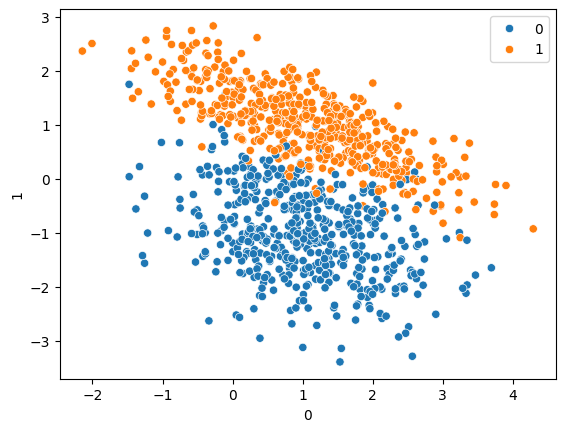

In [11]:
#sns.scatterplot(df,df1,hue=Y)
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=Y)

In [14]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=10)

In [15]:
from sklearn.svm import SVC

In [16]:
svc = SVC(kernel='linear')

In [17]:
svc.fit(X_train,Y_train)

SVC(kernel='linear')

In [18]:
#Prediction
y_pred = svc.predict(X_test)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
print(classification_report(Y_test,y_pred))
print(confusion_matrix(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       124
           1       0.98      0.95      0.96       126

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250

[[121   3]
 [  6 120]]


In [35]:
svc.coef_

array([[1.39852443, 3.06846205]])

In [22]:
#lets use rbf kernel
rbf = SVC(kernel='rbf')
rbf.fit(X_train,Y_train)


SVC()

In [23]:
y_pred1 = rbf.predict(X_test)
print(classification_report(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       124
           1       0.97      0.96      0.96       126

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250

[[120   4]
 [  5 121]]


In [25]:
#lets use poplynomial kernel
poly = SVC(kernel='poly')
poly.fit(X_train,Y_train)
y_pred2 = poly.predict(X_test)
print(classification_report(Y_test,y_pred2))
print(confusion_matrix(Y_test,y_pred2))



              precision    recall  f1-score   support

           0       0.90      1.00      0.95       124
           1       1.00      0.89      0.94       126

    accuracy                           0.94       250
   macro avg       0.95      0.94      0.94       250
weighted avg       0.95      0.94      0.94       250

[[124   0]
 [ 14 112]]


In [26]:
#lets use sigmoid kernel
sig = SVC(kernel='sigmoid')
sig.fit(X_train,Y_train)
y_pred3 = sig.predict(X_test)
print(classification_report(Y_test,y_pred3))
print(confusion_matrix(Y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       124
           1       0.83      0.76      0.80       126

    accuracy                           0.80       250
   macro avg       0.81      0.80      0.80       250
weighted avg       0.81      0.80      0.80       250

[[105  19]
 [ 30  96]]


In [33]:
sig.intercept_

array([-4.86548555])

In [27]:
#Hyper parameter tunning
param_grid = {'C':[0.1,10,100,1000],
              'gamma':[1,0.1,0.01,0.001,0.0001],
              'kernel':['rbf','poly','linear','sigmoid']}

In [28]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid=param_grid,cv=5,verbose=3,refit=True)

In [29]:
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.927 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.940 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.947 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.940 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.940 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.960 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'linear', 'sigmoid']},
             verbose=3)

In [30]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [31]:
#prediction
y_pred4 = grid.predict(X_test)
print(classification_report(Y_test,y_pred4))
print(confusion_matrix(Y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       124
           1       0.98      0.95      0.96       126

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250

[[121   3]
 [  6 120]]
